In [9]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [10]:
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[2]))
            prices.append(float(row[1]))

def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates),1))

    svr_lin = SVR(kernel = 'linear', C=1e3)
    svr_poly = SVR(kernel = 'poly', C=1e3, degree = 2)
    svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma=0.1)
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)

    plt.scatter(dates, prices, color='black')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF Model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear Model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial Model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

In [11]:
dates = []
prices = []

In [12]:
get_data('AAPL.csv')

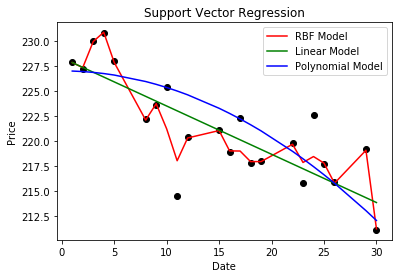

In [13]:
predicted_price = predict_prices(dates,prices, 31)

In [14]:
print(predicted_price)

(202.7107685335477, 213.389993400242, 211.06977940317933)
